## 1. Data Preprocessing

### 1.1 Load Dataset

In [1]:
import csv
import pandas as pd
import numpy as np

fname = 'Rental Data + Other Datasets MERGED ANALYSIS'

In [2]:
df = pd.read_excel(fname+'.xlsx', parse_dates=['Date'], dayfirst=True)
df = df[df.Region == 'Wellington']
df.head()

,Date,Region,Territorial Authority,Geometric mean rents by region,Geometric mean rents by territorial authority,Synthetic lower quartile rents by region,Synthetic lower quartile rents by territorial authority,Lodged bonds by region,Lodged bonds by territorial authority,Regional GDP,...,Median Weekly Earnings 20-29,Number of Residential Building Consents,Student Enrolments by Region,Approved Student Visa,Approved Work Visa,Average Student Allowance,Average Accommodation,CPI,Mortgage Floating rate,Mortgage 2 year fixed rate
2550,2008-03-01,Wellington,Carterton District,333,197,249,152,1902,13,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2551,2008-03-01,Wellington,Kapiti Coast District,333,284,249,234,1902,131,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2552,2008-03-01,Wellington,Lower Hutt,333,283,249,220,1902,250,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2553,2008-03-01,Wellington,Masterton District,333,213,249,186,1902,33,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2554,2008-03-01,Wellington,Porirua,333,302,249,237,1902,104,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 2550 to 2884
Data columns (total 21 columns):
Date                                                       335 non-null datetime64[ns]
Region                                                     335 non-null object
Territorial Authority                                      335 non-null object
Geometric mean rents by region                             335 non-null int64
Geometric mean rents by territorial authority              335 non-null int64
Synthetic lower quartile rents by region                   335 non-null int64
Synthetic lower quartile rents by territorial authority    335 non-null int64
Lodged bonds by region                                     335 non-null int64
Lodged bonds by territorial authority                      335 non-null int64
Regional GDP                                               335 non-null int64
Population Estimate 15-39                                  335 non-null float64
Median Weekly Earnin

## 2. Data Understanding

### 2.1 Descriptive Stats

In [4]:
df.describe()

,Geometric mean rents by region,Geometric mean rents by territorial authority,Synthetic lower quartile rents by region,Synthetic lower quartile rents by territorial authority,Lodged bonds by region,Lodged bonds by territorial authority,Regional GDP,Population Estimate 15-39,Median Weekly Earnings 20-29,Number of Residential Building Consents,Student Enrolments by Region,Approved Student Visa,Approved Work Visa,Average Student Allowance,Average Accommodation,CPI,Mortgage Floating rate,Mortgage 2 year fixed rate
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,3.350000e+02,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.00000,335.000000,335.000000,335.00000
mean,356.355224,301.202985,266.134328,242.331343,1811.316418,226.776119,30583.131343,1.514026e+06,613.293517,3355.910448,104954.671642,95338.529104,188132.849254,5957.955224,1235.01194,1.844478,6.382985,6.12209
std,34.278742,60.416375,23.092171,42.280296,673.223407,409.783060,3266.761418,7.704158e+04,43.614213,603.829003,4272.725095,9089.285680,29502.286351,190.335021,66.81931,1.358635,1.216913,1.06208
min,312.000000,171.000000,229.000000,125.000000,930.000000,7.000000,25074.000000,1.452448e+06,544.500000,2523.000000,99634.000000,76790.000000,151537.000000,5636.000000,1140.00000,0.100000,5.600000,5.00000
25%,330.000000,252.000000,249.000000,211.000000,1370.000000,28.000000,27767.000000,1.457983e+06,578.000000,2950.000000,100564.000000,88870.500000,162524.500000,5849.500000,1196.00000,0.900000,5.800000,5.20000
50%,346.000000,297.000000,260.000000,240.000000,1568.000000,89.000000,30460.000000,1.462965e+06,603.124921,3199.000000,104160.000000,94559.500000,174728.500000,5929.500000,1213.50000,1.600000,5.900000,6.00000
75%,374.000000,343.500000,279.000000,275.000000,1935.000000,168.500000,33422.000000,1.569095e+06,649.000000,3696.000000,109010.000000,104129.750000,222224.500000,6040.500000,1274.00000,2.000000,6.300000,6.60000
max,450.000000,489.000000,325.000000,351.000000,3448.000000,2451.000000,36115.000000,1.695545e+06,734.000000,4908.000000,113305.000000,106709.000000,235146.500000,6399.000000,1393.00000,5.300000,10.700000,9.50000


### 2.2 Histogram Plots

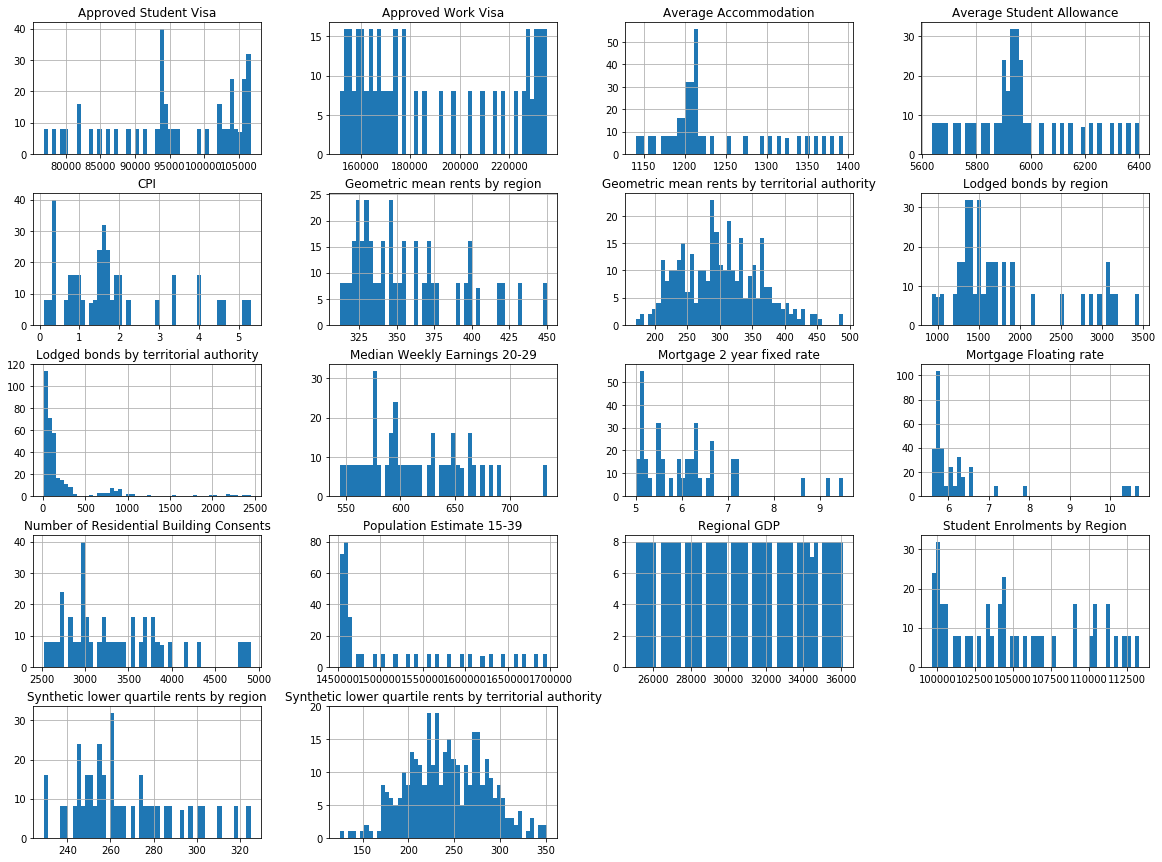

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15))
plt.show()

### 2.3 Correlation Matrix

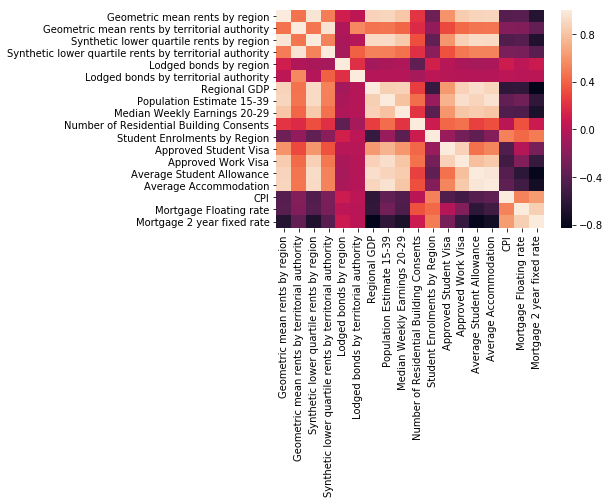

In [6]:
import seaborn as sns

corr = df.corr(method='pearson')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [7]:
corr["Geometric mean rents by territorial authority"].sort_values(ascending=False)

Geometric mean rents by territorial authority              1.000000
Synthetic lower quartile rents by territorial authority    0.961905
Lodged bonds by territorial authority                      0.551298
Synthetic lower quartile rents by region                   0.475303
Average Accommodation                                      0.475010
Average Student Allowance                                  0.472444
Population Estimate 15-39                                  0.467963
Geometric mean rents by region                             0.462849
Regional GDP                                               0.461813
Approved Work Visa                                         0.435258
Median Weekly Earnings 20-29                               0.415548
Approved Student Visa                                      0.304670
Number of Residential Building Consents                    0.177315
Lodged bonds by region                                    -0.035197
Student Enrolments by Region                    

### 2.4 Scatter Matrix

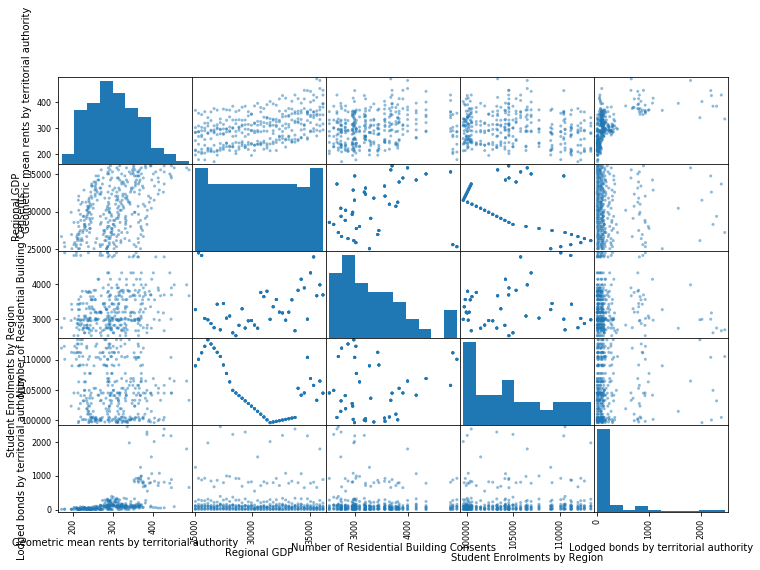

In [8]:
from pandas.plotting import scatter_matrix
attributes = ["Geometric mean rents by territorial authority",
#               "Synthetic lower quartile rents by territorial authority", 
#               "Synthetic lower quartile rents by region", 
#               "Geometric mean rents by region", 
              "Regional GDP",
             "Number of Residential Building Consents",
#              "Lodged bonds by region",
              "Student Enrolments by Region",
              "Lodged bonds by territorial authority"
#               "Average Student Allowance",
#               "Average Accommodation",
#               "Population Estimate 15-39",
#               "Approved Work Visa",
#               "Median Weekly Earnings"
             ]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

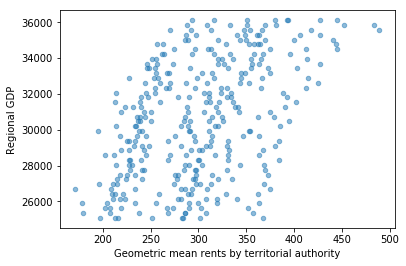

In [9]:
## Highest correlating geature to geometric mean rents by territorial authority
df.plot(kind="scatter", x="Geometric mean rents by territorial authority", y="Regional GDP", alpha=0.5)

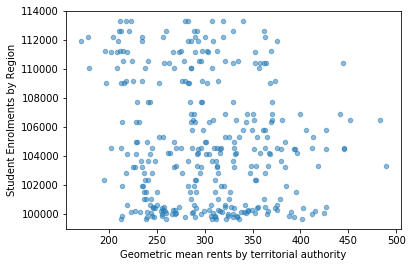

In [10]:
## Highest correlating geature to geometric mean rents by territorial authority
df.plot(kind="scatter", x="Geometric mean rents by territorial authority", y="Student Enrolments by Region", alpha=0.5)

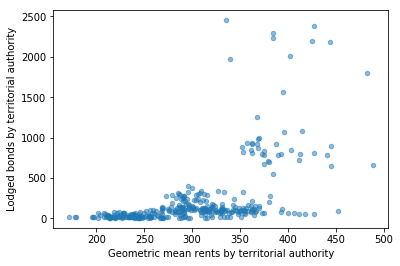

In [11]:
## Highest correlating geature to geometric mean rents by territorial authority
df.plot(kind="scatter", x="Geometric mean rents by territorial authority", y="Lodged bonds by territorial authority", alpha=0.5)

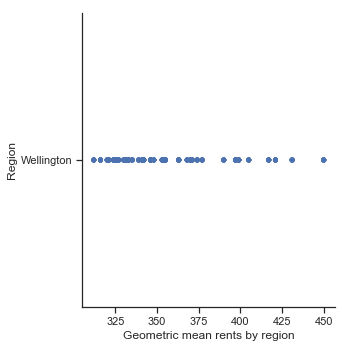

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

sns.catplot(x="Geometric mean rents by region", y="Region", jitter=False, data=df);

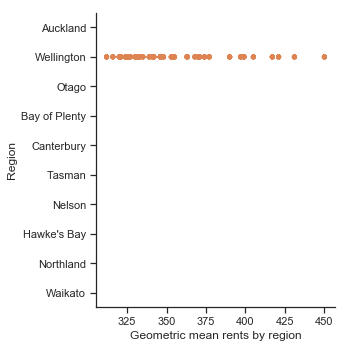

In [13]:
#order by max
sns.catplot(x="Geometric mean rents by region", y="Region", 
            order=['Auckland','Wellington','Otago', 'Bay of Plenty','Canterbury',
                   'Tasman','Nelson','Hawke\'s Bay','Northland','Waikato'],
            jitter=False, data=df);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


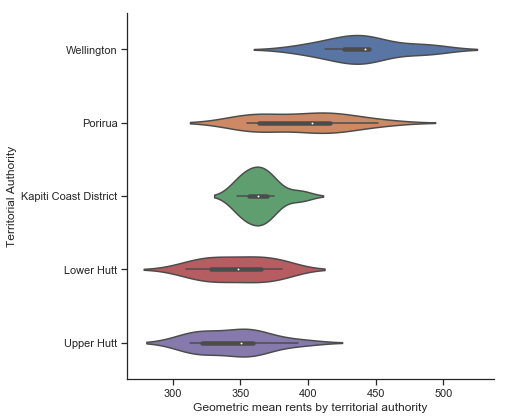

In [14]:
# regions = df['Region']
# for region in regions:
from textwrap import wrap

labels = ['Wellington','Porirua','Kapiti Coast District','Lower Hutt','Upper Hutt']
labels = [ '\n'.join(wrap(l, 25)) for l in labels ]


region_df = df[df['Region']=='Wellington']
region_df = df[df['Date'].dt.year >= 2016]
sns.catplot(x="Geometric mean rents by territorial authority", y="Territorial Authority", orient="h", 
            order=labels, height=6, aspect=1.2, kind="violin", data=region_df)

## 3. Data Preparation - Model and Feature Selection

### 3.1 Data Transformation

In [15]:
## Deleting Date of format DateTime as we need int and float objects for regression
import datetime as dt
df['Date']=df['Date'].map(dt.datetime.toordinal)

# Converting categorical values of region and territorial authority to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i].fillna('NA'))
df.head()

,Date,Region,Territorial Authority,Geometric mean rents by region,Geometric mean rents by territorial authority,Synthetic lower quartile rents by region,Synthetic lower quartile rents by territorial authority,Lodged bonds by region,Lodged bonds by territorial authority,Regional GDP,...,Median Weekly Earnings 20-29,Number of Residential Building Consents,Student Enrolments by Region,Approved Student Visa,Approved Work Visa,Average Student Allowance,Average Accommodation,CPI,Mortgage Floating rate,Mortgage 2 year fixed rate
2550,733102,0,0,333,197,249,152,1902,13,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2551,733102,0,1,333,284,249,234,1902,131,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2552,733102,0,2,333,283,249,220,1902,250,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2553,733102,0,3,333,213,249,186,1902,33,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2554,733102,0,4,333,302,249,237,1902,104,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5


### 3.2 Eliminating Multi-collinearity

No labels provided. Feature importance based methods are not available.
7 features with a correlation magnitude greater than 0.90.



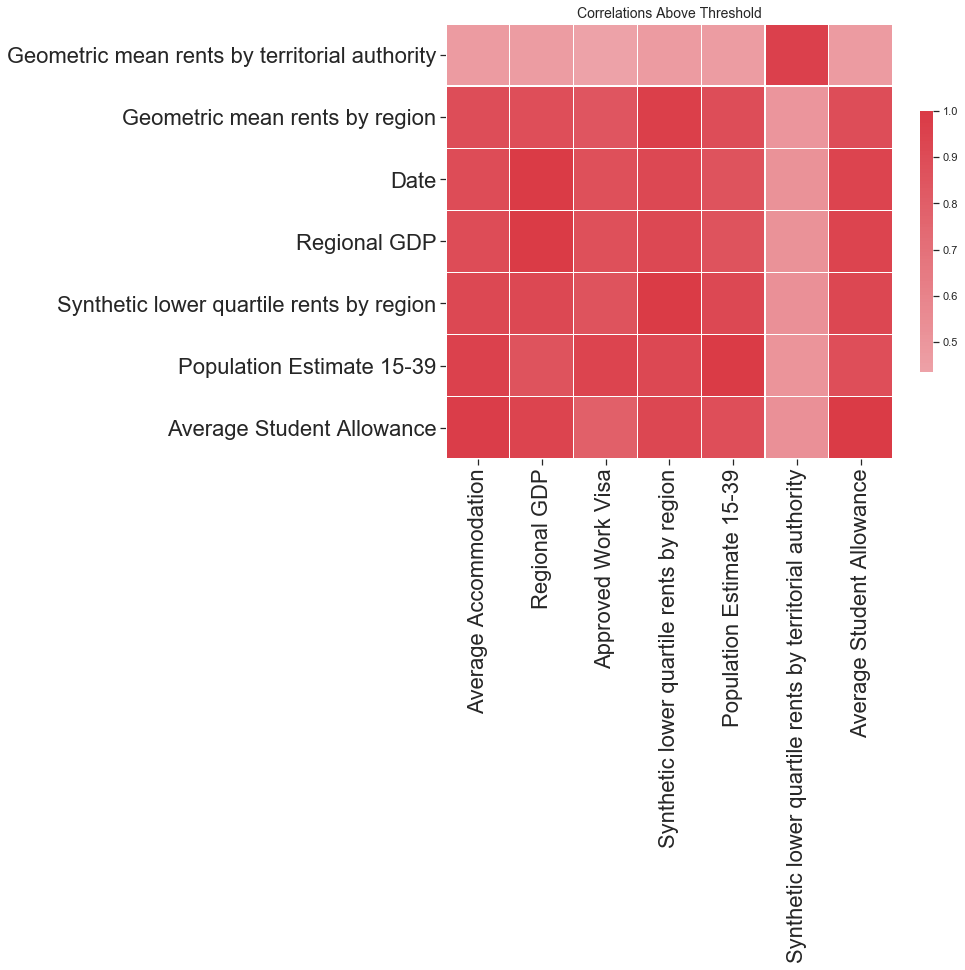

In [16]:
from feature_selector import FeatureSelector
fs=FeatureSelector(df)
fs.identify_collinear(correlation_threshold = 0.90)
fs.plot_collinear()

In [17]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']

# dataframe of collinear features
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,Synthetic lower quartile rents by region,Date,0.917297
1,Synthetic lower quartile rents by region,Geometric mean rents by region,0.970212
2,Synthetic lower quartile rents by territorial ...,Geometric mean rents by territorial authority,0.961905
3,Regional GDP,Date,1.000000
4,Regional GDP,Synthetic lower quartile rents by region,0.917330
5,Population Estimate 15-39,Synthetic lower quartile rents by region,0.915342
6,Approved Work Visa,Population Estimate 15-39,0.940815
7,Average Student Allowance,Date,0.936275
8,Average Student Allowance,Synthetic lower quartile rents by region,0.924371
9,Average Student Allowance,Regional GDP,0.936274


No labels provided. Feature importance based methods are not available.
1 features with a correlation magnitude greater than 0.90.



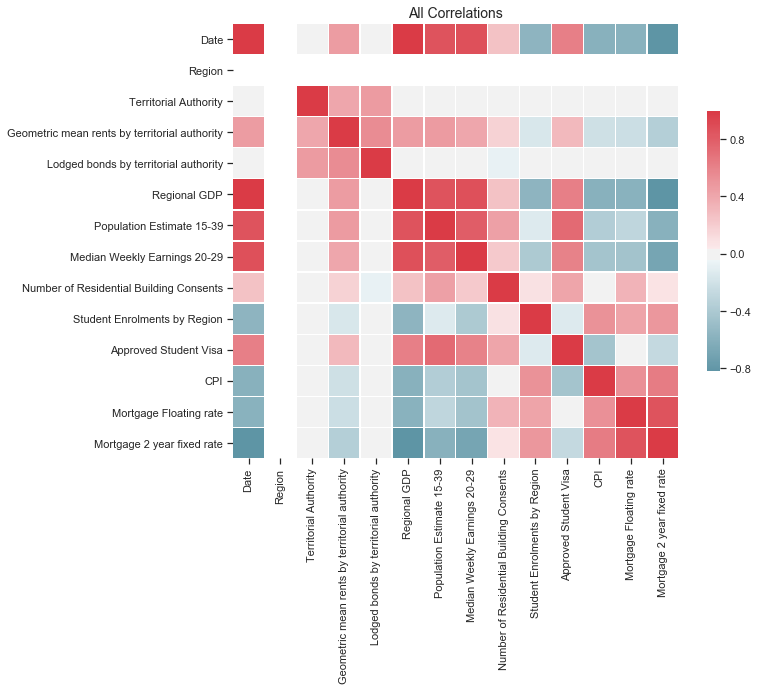

In [18]:
df.drop('Synthetic lower quartile rents by territorial authority',axis=1,inplace=True)
df.drop('Synthetic lower quartile rents by region',axis=1,inplace=True)
df.drop('Geometric mean rents by region',axis=1,inplace=True)
df.drop('Lodged bonds by region',axis=1,inplace=True)

df.drop('Approved Work Visa',axis=1,inplace=True)
df.drop('Average Student Allowance',axis=1,inplace=True)
df.drop('Average Accommodation',axis=1,inplace=True)

fs=FeatureSelector(df)
fs.identify_collinear(correlation_threshold = 0.90)

# list of collinear features to remove
collinear_features = fs.ops['collinear']

# dataframe of collinear features
fs.record_collinear
fs.plot_collinear(plot_all = True)

### 3.2 Model Selection

In [19]:
## Choosing Geometric mean as target as less affected by outliers compared to arithemtic mean 
df['target'] = df['Geometric mean rents by territorial authority']
df.drop('Geometric mean rents by territorial authority',axis=1,inplace=True)

features = df[df.columns.difference(df['target'])]
labels = df['target']
features.drop('target',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
print(features.shape, ' ',labels.shape)

(335, 13)   (335,)


### 3.3 Feature Selection

In [21]:
fs=FeatureSelector(data=features, labels=labels)
fs.identify_zero_importance(task = 'regression', 
                            eval_metric = 'auc', 
                            n_iterations = 30, 
                             early_stopping = True)

# list of zero importance features
fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until

['Population Estimate 15-39', 'Region', 'Regional GDP']

In [22]:
# fs.identify_low_importance(cumulative_importance = 0.99)
# fs.ops['low_importance']

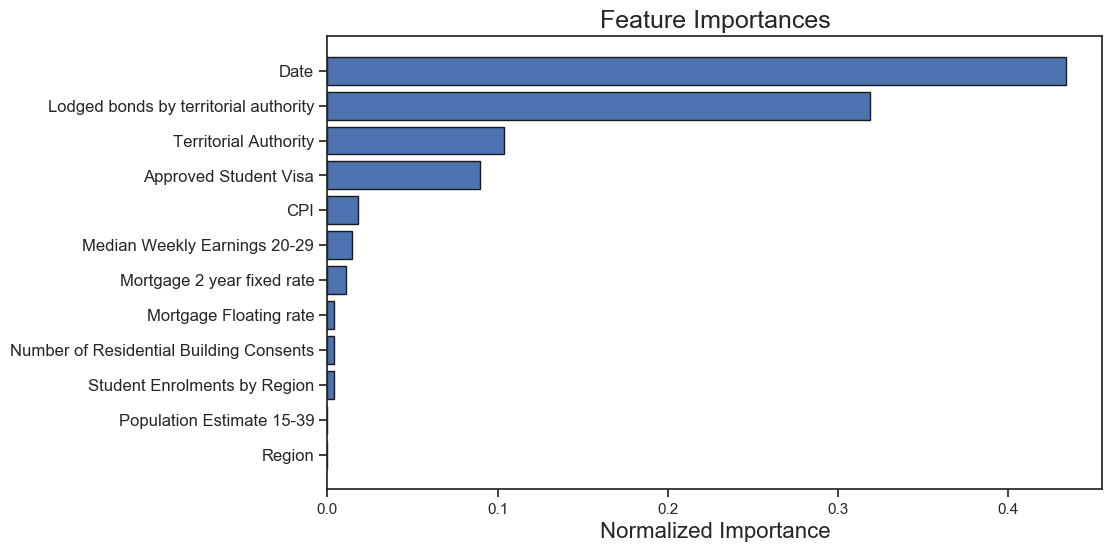

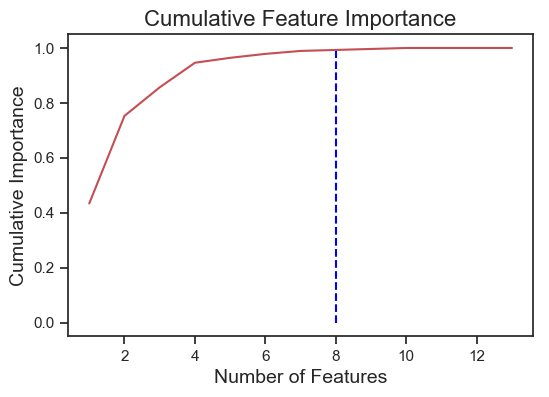

8 features required for 0.99 of cumulative importance


In [23]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [24]:
fs.feature_importances

,feature,importance,normalized_importance,cumulative_importance
0,Date,4.033333,0.433692,0.433692
1,Lodged bonds by territorial authority,2.966667,0.318996,0.752688
2,Territorial Authority,0.966667,0.103943,0.856631
3,Approved Student Visa,0.833333,0.089606,0.946237
4,CPI,0.166667,0.017921,0.964158
5,Median Weekly Earnings 20-29,0.133333,0.014337,0.978495
6,Mortgage 2 year fixed rate,0.100000,0.010753,0.989247
7,Mortgage Floating rate,0.033333,0.003584,0.992832
8,Number of Residential Building Consents,0.033333,0.003584,0.996416
9,Student Enrolments by Region,0.033333,0.003584,1.000000


In [25]:
features = fs.remove(methods='all',keep_one_hot=False)

['zero_importance'] methods have been run

Removed 3 features including one-hot features.


In [26]:
features.head()

,Approved Student Visa,CPI,Date,Lodged bonds by territorial authority,Median Weekly Earnings 20-29,Mortgage 2 year fixed rate,Mortgage Floating rate,Number of Residential Building Consents,Student Enrolments by Region,Territorial Authority
2550,95355.0,3.4,733102,13,594.5,9.5,10.4,3273,109010,0
2551,95355.0,3.4,733102,131,594.5,9.5,10.4,3273,109010,1
2552,95355.0,3.4,733102,250,594.5,9.5,10.4,3273,109010,2
2553,95355.0,3.4,733102,33,594.5,9.5,10.4,3273,109010,3
2554,95355.0,3.4,733102,104,594.5,9.5,10.4,3273,109010,4


## 4. Modelling

### 4.1 Before and After Collinearity

In [39]:
# df_bf_collinear = pd.read_excel(fname+'.xlsx', parse_dates=['Date'], dayfirst=True)

# #remove other target variables
# df_bf_collinear['target'] = df_bf_collinear['Geometric mean rents by territorial authority']
# df_bf_collinear.drop('Geometric mean rents by territorial authority',axis=1,inplace=True)
# df_bf_collinear.drop('Synthetic lower quartile rents by territorial authority',axis=1,inplace=True)
# df_bf_collinear.drop('Synthetic lower quartile rents by region',axis=1,inplace=True)
# df_bf_collinear.drop('Geometric mean rents by region',axis=1,inplace=True)

# #remove highly correlated vars 
# df_bf_collinear.drop('Lodged bonds by region',axis=1,inplace=True)
# df_bf_collinear.drop('Approved Work Visa',axis=1,inplace=True)
# df_bf_collinear.drop('Average Student Allowance',axis=1,inplace=True)
# df_bf_collinear.drop('Average Accommodation',axis=1,inplace=True)

# #
# df_bf_collinear['Date']=df_bf_collinear['Date'].map(dt.datetime.toordinal)
# fit = df_bf_collinear.select_dtypes(include=['object']).apply(lambda x: d[x.name].fit_transform(x))
# for i in list(d.keys()):
#     df_bf_collinear[i] = d[i].transform(df_bf_collinear[i].fillna('NA'))
# df_bf_collinear.head()

# features = df_bf_collinear[df_bf_collinear.columns.difference(df_bf_collinear['target'])]
# features.drop('target',axis=1,inplace=True)
# df_bf_collinear.head()

### 4.2 Gradient Boosting Regression Model

In [40]:
from sklearn.cross_validation import train_test_split

final_vars = list(features) + ['target']
df1 = df[final_vars]
df1.head()

df['Date']=df['Date'].map(dt.datetime.fromordinal)
# train, test = train_test_split(df1, test_size = 0.4)
train = df[df['Date'].dt.year <= 2016]
test = df[df['Date'].dt.year > 2016]

train['Date']=train['Date'].map(dt.datetime.toordinal)
test['Date']=test['Date'].map(dt.datetime.toordinal)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

X_train  = train[list(features)]
y_train  = train['target']
X_test = test[list(features)]
y_test  = test['target']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


#### 4.2.1 Gradient Boosting - Hyperparameter Tuning  

In [41]:
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingRegressor()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 2, verbose=2, n_jobs = -1)
gf_tune.fit(X_train, y_train)

print(gf_tune.best_params_)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 705 out of 720 | elapsed:   10.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   10.5s finished


{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 391}


#### 4.2.2 Model

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.learning_curve import learning_curve
import time
start_time = time.time()

model = GradientBoostingRegressor(**gf_tune.best_params_)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))
print('Gradient Boosting RMSE: %.4f' % model_rmse)


Gradient Boosting R squared: 0.8590
Gradient Boosting RMSE: 21.5778


#### 4.2.3 Evaluating Feature Importance

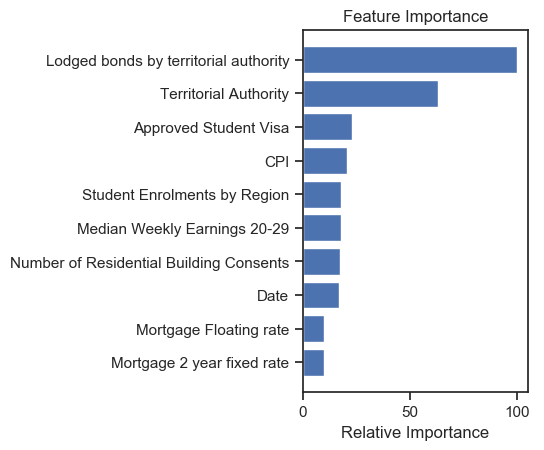

Lodged bonds by territorial authority-100.00%
Territorial Authority-63.07%
Approved Student Visa-23.12%
CPI-20.90%
Student Enrolments by Region-17.84%
Median Weekly Earnings 20-29-17.71%
Number of Residential Building Consents-17.33%
Date-16.89%
Mortgage Floating rate-10.20%
Mortgage 2 year fixed rate-10.15%
--- 0.21574950218200684 seconds ---


In [43]:
feature_labels = list(features)
feature_importance = model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.asarray(feature_labels)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

feature_indexes_by_importance = feature_importance.argsort()
for index in reversed(feature_indexes_by_importance):
    print('{}-{:.2f}%'.format(feature_labels[index], (feature_importance[index])))
    
print("--- %s seconds ---" % (time.time() - start_time))

#### 4.2.4 Learning Curve

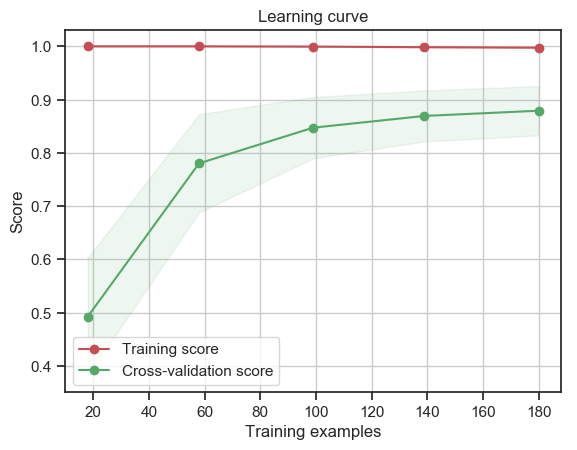

In [44]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
        
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(model, "Learning curve", X_train, y_train, cv=10, n_jobs=3) 
plt.show()